1. ETF - bunch of funds compiled. Easy way to diversify your assets.    s&p 500
2. Mutual Fund
3. Hedge Fund - beat the benchmark

return of portfolio
r(t) = sum(w * r)

weight of a prticular company
w = market_cap / sum(all_of_the_market_cap)

capm model
ri(t) = Bi * rm(t) + ai(t)

the equation implies no possiblilty of beating the market, since alpha is limit to 0

wanting to beat alpha is the same as predicting. you predict more than 50% right, you gain. 

breaking up the capm model :
rp(t) = Bp rm(t) sum(wi*ai) 

in regard to the previous eq, putting proper weights to your portfolio could boost up gain

In [1]:
from scipy import stats

In [2]:
help(stats.linregress)

Help on function linregress in module scipy.stats._stats_mstats_common:

linregress(x, y=None)
    Calculate a linear least-squares regression for two sets of measurements.
    
    Parameters
    ----------
    x, y : array_like
        Two sets of measurements.  Both arrays should have the same length.  If
        only `x` is given (and ``y=None``), then it must be a two-dimensional
        array where one dimension has length 2.  The two sets of measurements
        are then found by splitting the array along the length-2 dimension.  In
        the case where ``y=None`` and `x` is a 2x2 array, ``linregress(x)`` is
        equivalent to ``linregress(x[0], x[1])``.
    
    Returns
    -------
    slope : float
        Slope of the regression line.
    intercept : float
        Intercept of the regression line.
    rvalue : float
        Correlation coefficient.
    pvalue : float
        Two-sided p-value for a hypothesis test whose null hypothesis is
        that the slope is zero, 

In [3]:
import pandas as pd

In [4]:
import pandas_datareader as web

In [5]:
spy_etf = web.DataReader('SPY', 'yahoo')

In [6]:
spy_etf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2014-11-25 to 2019-11-22
Data columns (total 6 columns):
High         1258 non-null float64
Low          1258 non-null float64
Open         1258 non-null float64
Close        1258 non-null float64
Volume       1258 non-null float64
Adj Close    1258 non-null float64
dtypes: float64(6)
memory usage: 68.8 KB


In [12]:
spy_etf.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-11-25,207.789993,206.800003,207.539993,207.110001,79108300.0,187.569260
2014-11-26,207.759995,207.029999,207.289993,207.639999,62167800.0,188.049255
2014-11-28,207.869995,206.910004,207.490005,207.199997,57890100.0,187.650757
2014-12-01,206.539993,205.380005,206.399994,205.759995,103968400.0,186.346588
2014-12-02,207.339996,205.779999,205.809998,207.089996,74507200.0,187.551132


In [29]:
start = pd.to_datetime('2014-11-26')
end = pd.to_datetime('2019-11-22')

In [30]:
aapl = web.DataReader('AAPL','yahoo', start, end)

In [31]:
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-11-25,119.750000,117.449997,119.070000,117.599998,68840400.0,108.052910
2014-11-26,119.099998,117.830002,117.940002,119.000000,40768300.0,109.339249
2014-11-28,119.400002,118.050003,119.269997,118.930000,24814400.0,109.274948
2014-12-01,119.250000,111.269997,118.809998,115.070000,83814000.0,105.728317
2014-12-02,115.750000,112.750000,113.500000,114.629997,59348900.0,105.324020


In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

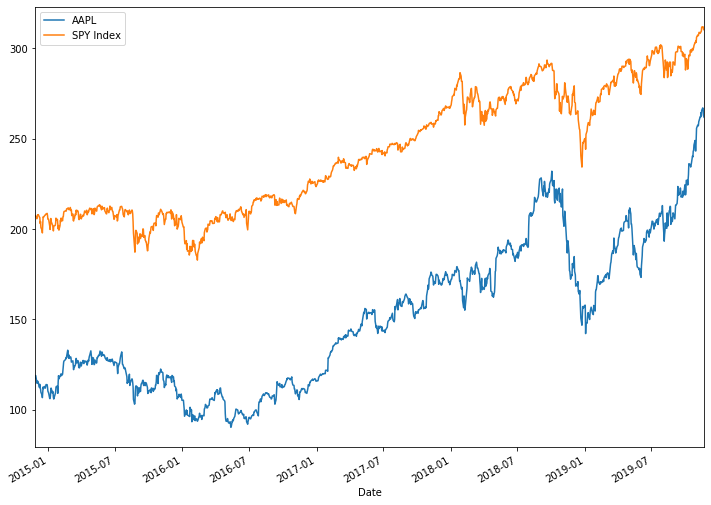

In [33]:
aapl['Close'].plot(label='AAPL', figsize =(12,9))
spy_etf['Close'].plot(label='SPY Index')
plt.legend()

In [34]:
spy_etf['Close']

Date
2014-11-25    207.110001
2014-11-26    207.639999
2014-11-28    207.199997
2014-12-01    205.759995
2014-12-02    207.089996
                 ...    
2019-11-18    312.019989
2019-11-19    311.929993
2019-11-20    310.769989
2019-11-21    310.269989
2019-11-22    310.959991
Name: Close, Length: 1258, dtype: float64

In [35]:
aapl['Close']

Date
2014-11-25    117.599998
2014-11-26    119.000000
2014-11-28    118.930000
2014-12-01    115.070000
2014-12-02    114.629997
                 ...    
2019-11-18    267.100006
2019-11-19    266.290009
2019-11-20    263.190002
2019-11-21    262.010010
2019-11-22    261.779999
Name: Close, Length: 1258, dtype: float64

In [36]:
aapl['Cumulative'] = aapl['Close']/aapl['Close'].iloc[0]
spy_etf['Cumulative'] = spy_etf['Close']/spy_etf['Close'].iloc[0]

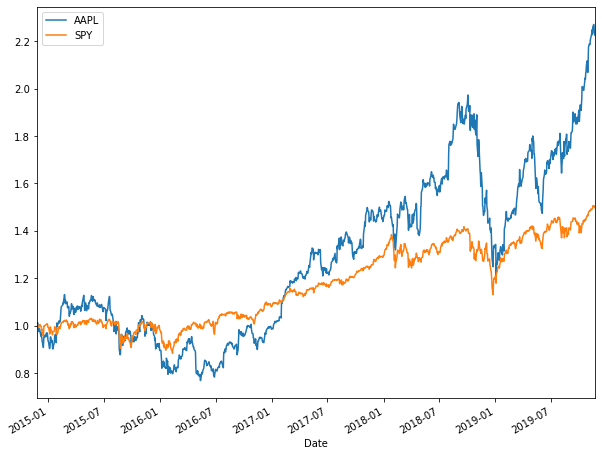

In [37]:
aapl['Cumulative'].plot(label='AAPL', figsize=(10,8))
spy_etf['Cumulative'].plot(label='SPY')
plt.legend()

In [41]:
aapl['Daily Return'] = aapl['Close'].pct_change(1)
spy_etf['Daily Return'] = spy_etf['Close'].pct_change(1)

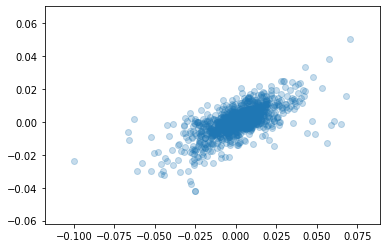

In [42]:
plt.scatter(aapl['Daily Return'], spy_etf['Daily Return'], alpha=0.25)

finding b and a using linear regression 

In [45]:
beta, alpha, r_value, p_value, std_err = stats.linregress(aapl['Daily Return'].iloc[1:], spy_etf['Daily Return'].iloc[1:])

In [46]:
beta

0.36766812826788464

In [47]:
alpha

8.050422072183937e-05

In [48]:
r_value

0.6744606324622254

In [49]:
spy_etf['Daily Return'].head()

Date
2014-11-25         NaN
2014-11-26    0.002559
2014-11-28   -0.002119
2014-12-01   -0.006950
2014-12-02    0.006464
Name: Daily Return, dtype: float64

In [50]:
import numpy as np

In [51]:
noise = np.random.normal(0, 1e-3, len(spy_etf['Daily Return'].iloc[1:]))

In [52]:
noise

array([-1.30431630e-03,  4.15510160e-04, -7.30337045e-05, ...,
       -1.42988229e-04, -1.02950168e-03,  6.24162504e-04])

In [54]:
fake_stock = spy_etf['Daily Return'].iloc[1:] + noise

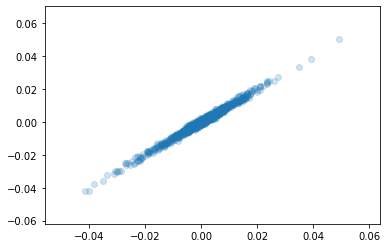

In [55]:
plt.scatter(fake_stock, spy_etf['Daily Return'].iloc[1:], alpha=0.2)

In [56]:
beta, alpha, r_value, p_value, std_err = stats.linregress(fake_stock, spy_etf['Daily Return'].iloc[1:])

In [57]:
beta

0.9913140404650134

In [59]:
alpha

-8.031485452879262e-06